In [1]:
!pip install --force --quiet --no-deps git+https://github.com/maxim-borisyak/pythia-mill.git

In [2]:
from pythiamill import PythiaMill
from pythiamill.utils import *
from time import time

import numpy as np

from tqdm import tqdm_notebook as tqdm

In [3]:
options=[
  'Print:quiet = on',
  'Init:showProcesses = off',
  'Init:showMultipartonInteractions = off',
  'Init:showChangedSettings = off',
  'Init:showChangedParticleData = off',
  'Next:numberCount=0',
  'Next:numberShowInfo=0',
  'Next:numberShowEvent=0',
  'Stat:showProcessLevel=off',
  'Stat:showErrors=off',
  'Beams:idA =  2212',
  "Beams:idB = 2212",
  "Beams:eCM = 8000",
  'HardQCD:all = on',
  'PromptPhoton:all = on',
  "PhaseSpace:pTHatMin = 20"
  #'Random:seed=0'
]

In [4]:
n_batches = 1024
batch_size = 32
n_workers = 8

detector = SVELO(
    pseudorapidity_steps = 32, phi_steps = 32,
    n_layers = 10, R_min=1, R_max = 21,
    activation_probability=0.5
)

In [5]:
mill = PythiaMill(detector, options, cache_size=16, batch_size=batch_size, n_workers=n_workers, seed=123)

data_train = np.vstack([
mill.sample().reshape(-1, 10, 32, 32)
    for _ in tqdm(range(n_batches))
])
mill.terminate()

HBox(children=(IntProgress(value=0, max=1024), HTML(value='')))

In [6]:
np.save('events_train.npy', data_train)

del data_train

In [7]:
mill = PythiaMill(detector, options, cache_size=16, batch_size=batch_size, n_workers=n_workers, seed=123)

data_test = np.vstack([
mill.sample().reshape(-1, 10, 32, 32)
    for _ in tqdm(range(n_batches))
])
mill.terminate()

HBox(children=(IntProgress(value=0, max=1024), HTML(value='')))

In [8]:
np.save('events_test.npy', data_test)

del data_test

In [9]:
mill = PythiaMill(detector, options, cache_size=16, batch_size=batch_size, n_workers=n_workers, seed=124)

data2 = np.vstack([
    mill.sample().reshape(-1, 10, 32, 32)
    for _ in tqdm(range(n_batches // 2))
])
mill.terminate()

HBox(children=(IntProgress(value=0, max=512), HTML(value='')))

In [10]:
np.save('events2.npy', data2)
del data2

In [11]:
mill = PythiaMill(detector, options, cache_size=16, batch_size=batch_size, n_workers=n_workers, seed=124)

data3 = np.vstack([
    mill.sample().reshape(-1, 10, 32, 32)
    for _ in tqdm(range(n_batches // 2))
])
mill.terminate()

HBox(children=(IntProgress(value=0, max=512), HTML(value='')))

In [12]:
np.save('events3.npy', data3)
del data3

## Introducing anomalies

In [13]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
def anomalies(data, n_layers_affected):
    for i in range(data.shape[0]):
        n_layers = np.random.randint(low=1, high=n_layers_affected)
        l_indx = np.random.choice(n_layers_affected, n_layers, replace=False)
        
        anomaly_type = np.array([-1, 1])[np.random.randint(0, 2, size=n_layers)]
        
        for j in range(n_layers):
            k = l_indx[j]
            if anomaly_type[j] == -1:
                ### blackout
                data[i, k] = 0
            else:
                ### noise
                data[i, k] = np.random.binomial(1, p=0.2, size=data[i, j].shape)
    return data

In [15]:
data2 = np.load('events2.npy')

In [16]:
anomalious1 = anomalies(data2.copy(), 10)

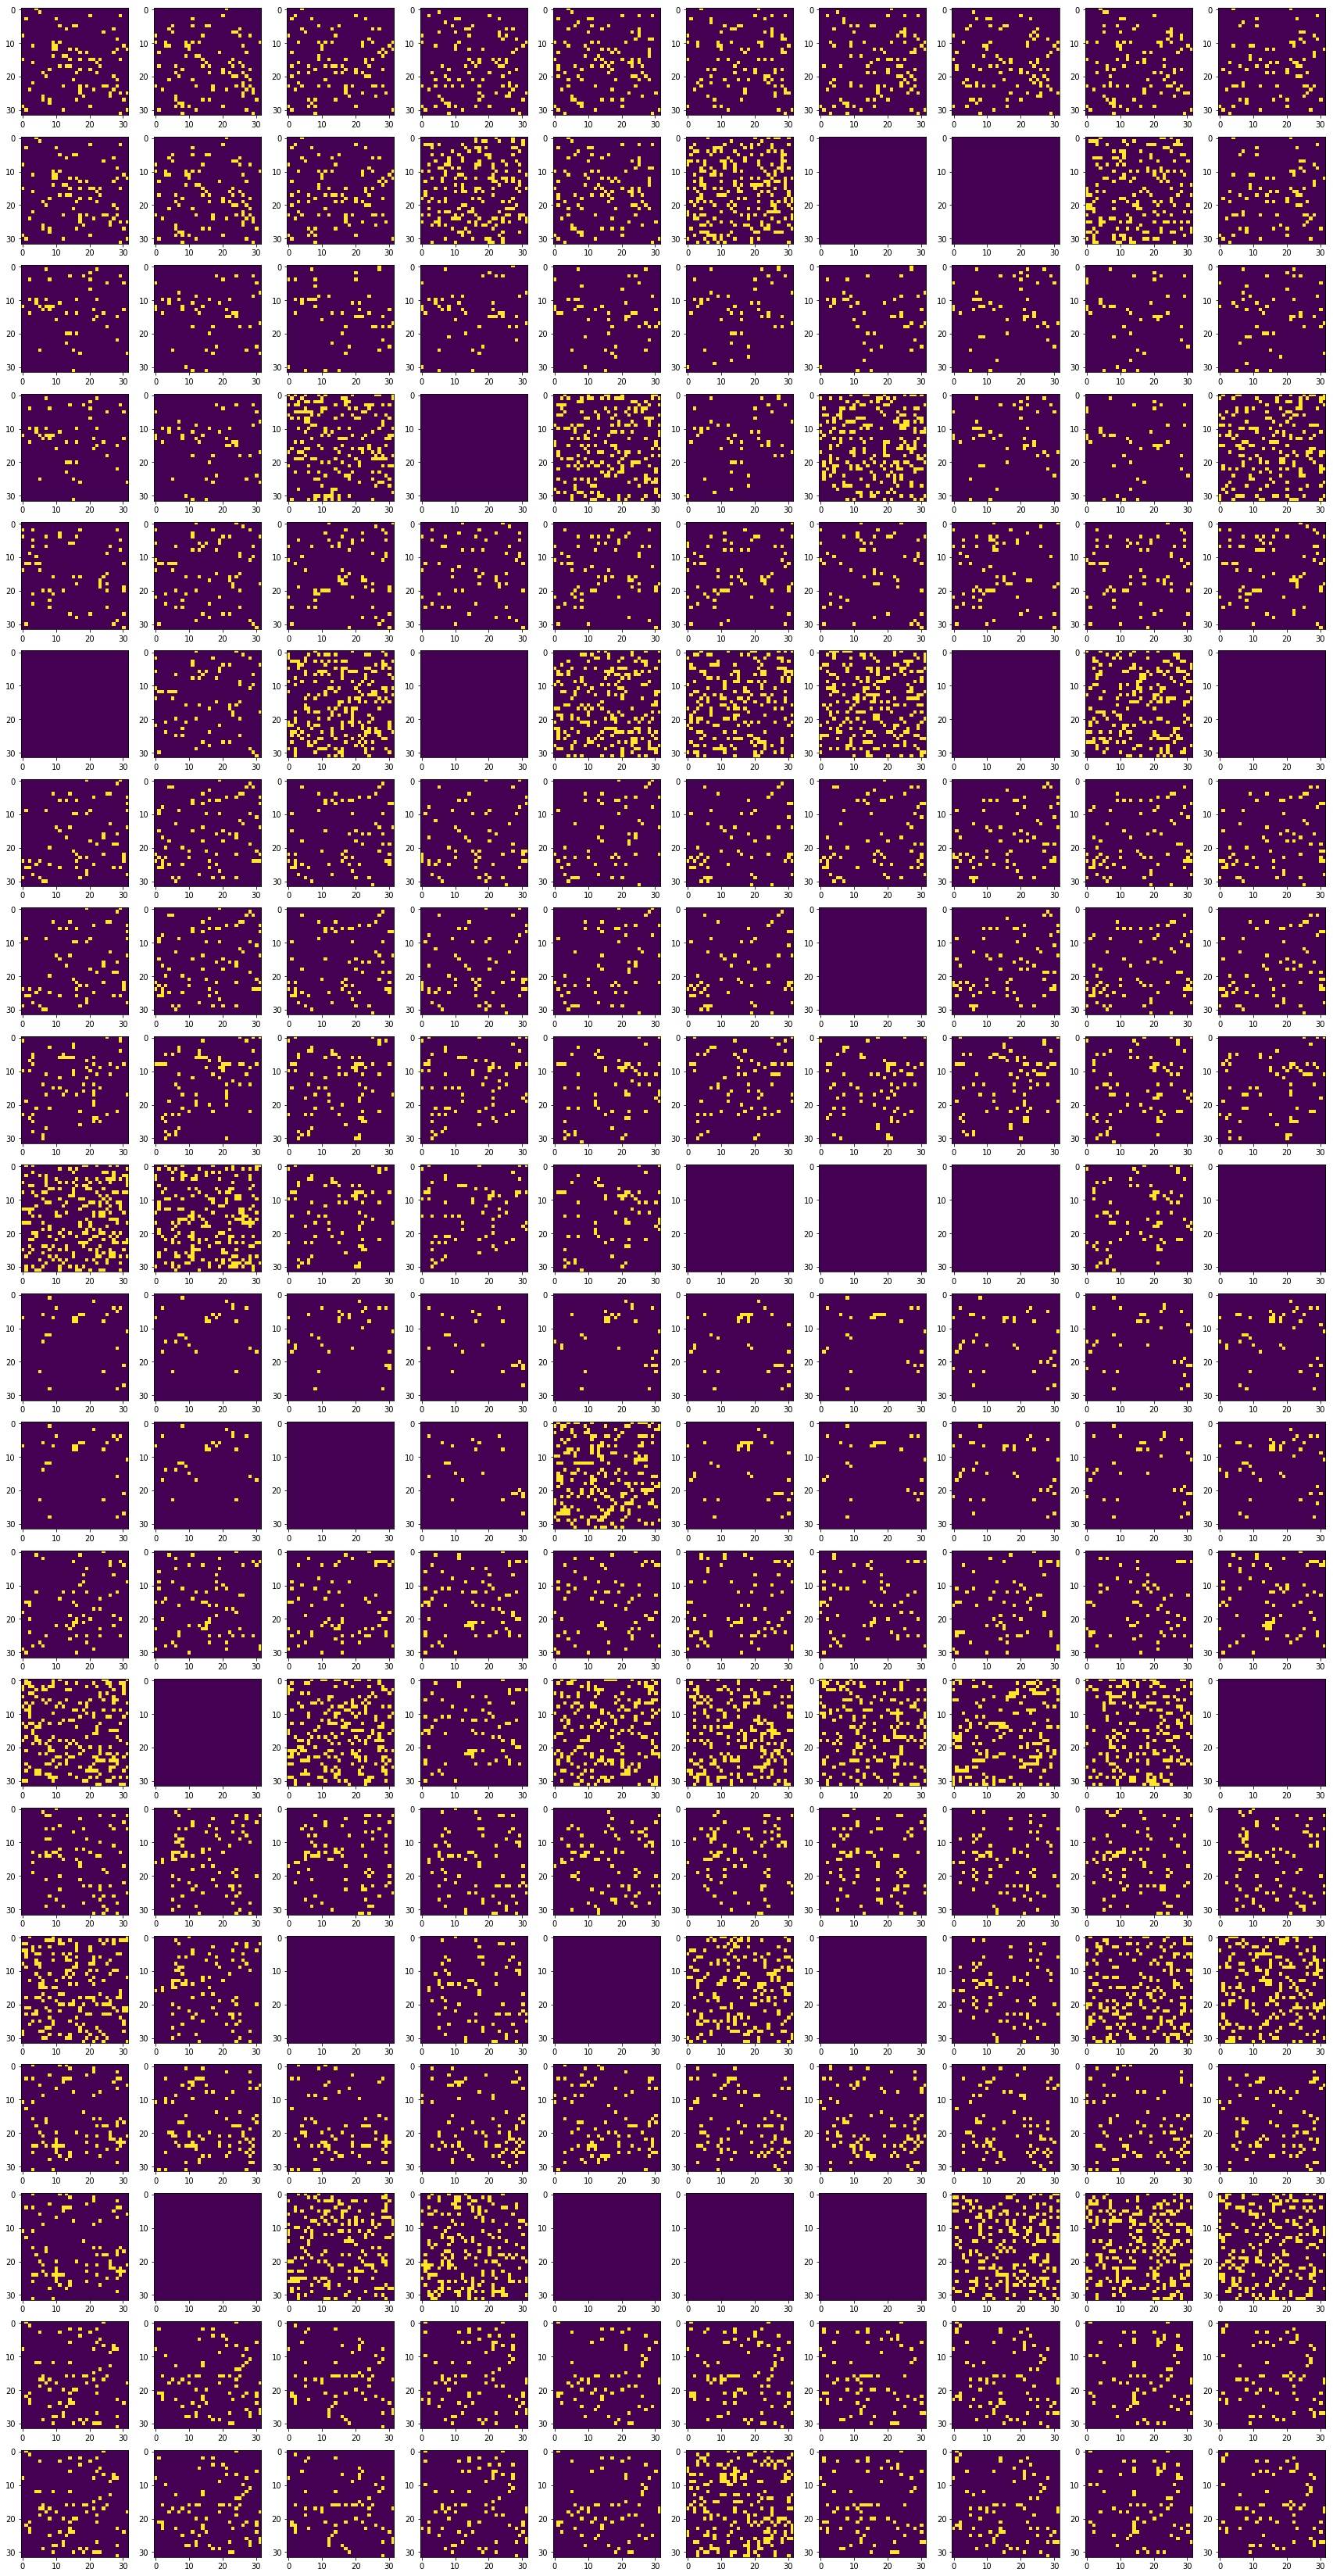

In [17]:
n_pics = 10
plt.figure(figsize=(30, 6 * n_pics))

fi = 1

for k in range(n_pics):
    for i in range(10):
        plt.subplot(n_pics * 2, 10, fi)
        fi += 1
        plt.imshow(data2[k, i])

    for i in range(10):
        plt.subplot(n_pics * 2, 10, fi)
        fi += 1
        plt.imshow(anomalious1[k, i])
    
plt.show()

In [18]:
np.save('anomalious_test', anomalious1)

In [19]:
del data2
del anomalious1

In [20]:
data3 = np.load('events3.npy')
anomalious2 = anomalies(data3.copy()[:32], 3)

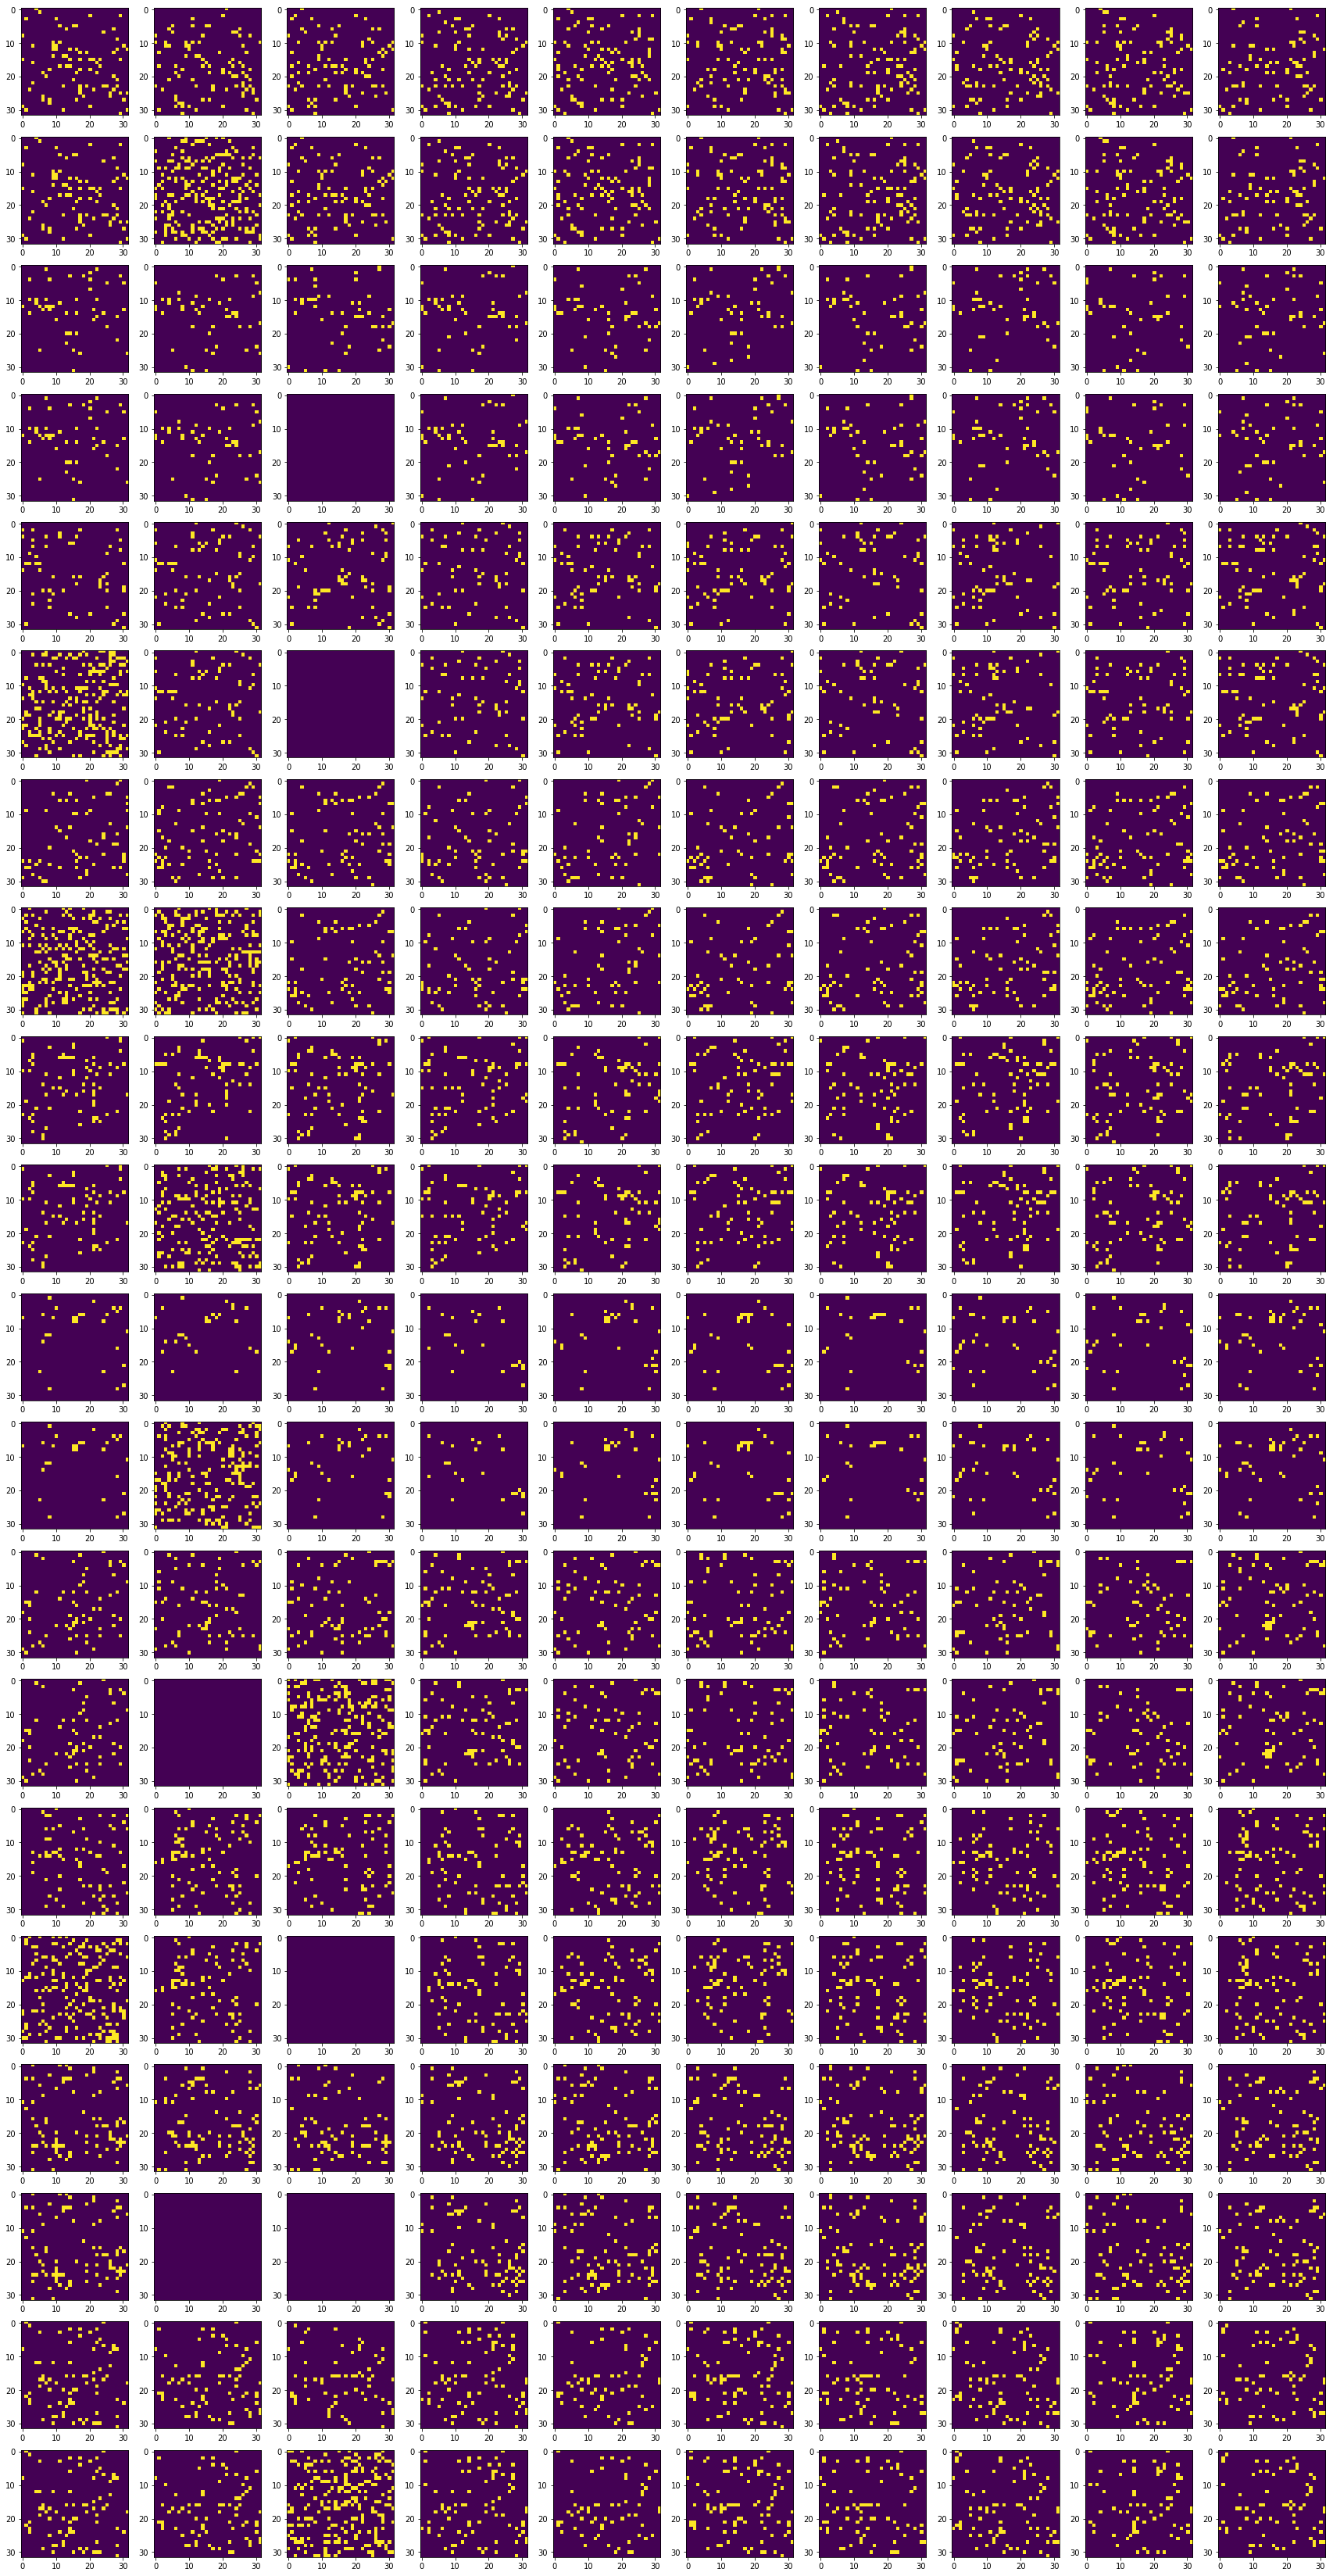

In [21]:
n_pics = 10
plt.figure(figsize=(30, 6 * n_pics))

fi = 1

for k in range(n_pics):
    for i in range(10):
        plt.subplot(n_pics * 2, 10, fi)
        fi += 1
        plt.imshow(data3[k, i])

    for i in range(10):
        plt.subplot(n_pics * 2, 10, fi)
        fi += 1
        plt.imshow(anomalious2[k, i])
    
plt.show()

In [22]:
np.save('anomalious_train', anomalious2)

In [23]:
del data3
del anomalious2